<!-- File automatically generated using DocOnce (https://github.com/doconce/doconce/):
doconce format ipynb polarhelmholtz.do.txt  -->

# Demo - Helmholtz equation in polar coordinates
**Mikael Mortensen** (email: `mikaem@math.uio.no`), Department of Mathematics, University of Oslo.

Date: **April 8, 2020**

**Summary.** This is a demonstration of how the Python module [shenfun](https://github.com/spectralDNS/shenfun) can be used to solve the
Helmholtz equation on a circular disc, using polar coordinates. This demo is implemented in
a single Python file [unitdisc_helmholtz.py](https://github.com/spectralDNS/shenfun/blob/master/demo/unitdisc_helmholtz.py),
and the numerical method is described in more detail by J. Shen [[shen3]](#shen3).

<!-- dom:FIGURE: [https://rawgit.com/spectralDNS/spectralutilities/master/figures/Helmholtzdisc.png, width=700 frac=1] Helmholtz on the unit disc. <a id="fig:helmholtz"></a> -->
<!-- begin figure -->
<a id="fig:helmholtz"></a>

<img src="https://rawgit.com/spectralDNS/spectralutilities/master/figures/Helmholtzdisc.png" width="700"><p style="font-size: 0.9em"><i>Figure 1: Helmholtz on the unit disc.</i></p>
<!-- end figure -->

## Helmholtz equation
<a id="demo:polar_helmholtz"></a>

The Helmholtz equation is given as

<!-- Equation labels as ordinary links -->
<a id="eq:helmholtz"></a>

$$
\begin{equation}
-\nabla^2 u(\boldsymbol{x}) + \alpha u(\boldsymbol{x}) = f(\boldsymbol{x}) \quad \text{for }\, \boldsymbol{x}=(x, y) \in \Omega, \label{eq:helmholtz} \tag{1}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<a id="_auto1"></a>

$$
\begin{equation}  
u =0 \text{ on } \partial \Omega,
\label{_auto1} \tag{2}
\end{equation}
$$

where $u(\boldsymbol{x})$ is the solution, $f(\boldsymbol{x})$ is a function and $\alpha$ a constant.
The domain is a circular disc $\Omega = \{(x, y): x^2+y^2 < a^2\}$ with radius $a$.
We use polar coordinates $(\theta, r)$, defined as

<!-- Equation labels as ordinary links -->
<a id="_auto2"></a>

$$
\begin{equation}
 x = r \cos \theta, 
\label{_auto2} \tag{3}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<a id="_auto3"></a>

$$
\begin{equation}  
 y = r \sin \theta,
\label{_auto3} \tag{4}
\end{equation}
$$

which leads to a Cartesian product mesh $(\theta, r) \in [0, 2\pi) \times (0, a)$
suitable for numerical implementations. Note that the
two directions are ordered with $\theta$ first and then $r$, which is less common
than $(r, \theta)$. This has to do with the fact that we will need to
solve linear equation systems along the radial direction, but not
the $\theta$-direction, since Fourier matrices are diagonal. When
the radial direction is placed last, the data in the radial direction
will be contigeous in a row-major C memory, leading to faster memory
access where it is needed the most. Note that it takes very few
changes in `shenfun` to switch the directions to $(r, \theta)$ if this
is still desired.

We will use Chebyshev
or Legendre basis functions $\psi_j(r)$ for the radial direction and
a periodic Fourier expansion in $\exp(\imath k \theta)$ for the
azimuthal direction. The polar basis functions are as such

<!-- Equation labels as ordinary links -->
<a id="_auto4"></a>

$$
\begin{equation}
v_{kj}(\theta, r) = \exp(\imath k \theta) \psi_j(r),
\label{_auto4} \tag{5}
\end{equation}
$$

and we look for solutions

<!-- Equation labels as ordinary links -->
<a id="_auto5"></a>

$$
\begin{equation}
u(\mathbf{x}) = \tilde{u}(\theta, r) = \sum_{k} \sum_{j} \hat{u}_{kj} v_{kj}(\theta, r).
\label{_auto5} \tag{6}
\end{equation}
$$

Note that $\tilde{u}$ is the function $u$ mapped to computational space.
From now on we will simply use $u(\theta, r)$ without the tilde, and assume that
the proper version of the function is understood from its arguments.

A discrete Fourier approximation space with $N$ basis functions is then

<!-- Equation labels as ordinary links -->
<a id="_auto6"></a>

$$
\begin{equation}
V_F^N = \text{span} \{\exp(\imath k \theta)| \text{ for } k \in K\},
\label{_auto6} \tag{7}
\end{equation}
$$

where the index set $K = \{-N/2, -N/2+1, \ldots, N/2-1\}$. Since the solution $u(\theta, r)$
is real, there is Hermitian symmetry and $\hat{u}_{k,j} = \hat{u}_{k,-j}^*$
(with $*$ denoting a complex conjugate).
For this reason we use only $k \in K=\{0, 1, \ldots, N/2\}$ in solving for
$\hat{u}_{kj}$, and then use Hermitian symmetry to get the remaining
unknowns. This is handled under the hood by fast Fourier transforms.

The radial basis is more tricky, because there is a nontrivial 'boundary'
condition (pole condition) that needs to be applied at the center of the disc $(r=0)$

<!-- Equation labels as ordinary links -->
<a id="_auto7"></a>

$$
\begin{equation}
\frac{\partial u(\theta, 0)}{\partial \theta} = 0.
\label{_auto7} \tag{8}
\end{equation}
$$

To apply this condition we split the solution into Fourier
coefficients with wavenumber 0 and $K\backslash \{0\}$,
remembering that the Fourier basis function with $k=0$ is
simply 1

<!-- Equation labels as ordinary links -->
<a id="_auto8"></a>

$$
\begin{equation}
u(\theta, r) = \sum_{j} \left( \hat{u}_{0j} \psi_{j}(r) + \sum_{k=1}^{N/2} \hat{u}_{kj} \exp(\imath k \theta) \psi_j(r) \right).
\label{_auto8} \tag{9}
\end{equation}
$$

We then apply a different radial basis for the two $\psi$'s in
the above equation (renaming the first $\overline{\psi}$)

<!-- Equation labels as ordinary links -->
<a id="_auto9"></a>

$$
\begin{equation}
u(\theta, r) = \sum_{j} \left( \hat{u}_{0j} \overline{\psi}_{j}(r) + \sum_{k=1}^{N/2} \hat{u}_{kj} \exp(\imath k \theta) \psi_j(r) \right).
\label{_auto9} \tag{10}
\end{equation}
$$

Note that the first term $\sum_{j} \hat{u}_{0j} \overline{\psi}_{j}(r)$ is independent
of $\theta$. Now, to enforce conditions

<!-- Equation labels as ordinary links -->
<a id="_auto10"></a>

$$
\begin{equation}
u(\theta, a) = 0, 
\label{_auto10} \tag{11}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<a id="_auto11"></a>

$$
\begin{equation}  
\frac{\partial u(\theta, 0)}{\partial \theta} = 0,
\label{_auto11} \tag{12}
\end{equation}
$$

it is sufficient for the two bases ($\overline{\psi}$ and $\psi$) to
satisfy

<!-- Equation labels as ordinary links -->
<a id="_auto12"></a>

$$
\begin{equation}
\overline{\psi}_j(a) = 0, 
\label{_auto12} \tag{13}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<a id="_auto13"></a>

$$
\begin{equation}  
\psi_j(a) = 0,
\label{_auto13} \tag{14}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<a id="_auto14"></a>

$$
\begin{equation}  
\psi_j(0) = 0.
\label{_auto14} \tag{15}
\end{equation}
$$

Bases that satisfy these conditions can be found both with Legendre and
Chebyshev polynomials.
If $\phi_j(x)$ is used for either the Legendre polynomial $L_j(x)$ or the
Chebyshev polynomial of the first kind $T_j(x)$, we can have

<!-- Equation labels as ordinary links -->
<a id="_auto15"></a>

$$
\begin{equation}
\overline{\psi}_j(r) = \phi_j(2r/a-1) - \phi_{j+1}(2r/a-1), \text{ for } j \in 0, 1, \ldots N-1, 
\label{_auto15} \tag{16}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<a id="eq:psi"></a>

$$
\begin{equation}  
\psi_j(r) = \phi_j(2r/a-1) - \phi_{j+2}(2r/a-1), \text{ for } j \in 0, 1, \ldots N-2.
\label{eq:psi} \tag{17}
\end{equation}
$$

Define the following approximation spaces for the radial direction

<!-- Equation labels as ordinary links -->
<a id="_auto16"></a>

$$
\begin{equation}
V_D^N = \text{span} \{\psi_j\}_{j=0}^{N-3} 
\label{_auto16} \tag{18}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<a id="_auto17"></a>

$$
\begin{equation}  
V_U^N = \text{span} \{\overline{\psi}_j\}_{j=0}^{N-2} 
\label{_auto17} \tag{19}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<a id="_auto18"></a>

$$
\begin{equation}  
\label{_auto18} \tag{20}
\end{equation}
$$

and split the function space for the azimuthal direction into

<!-- Equation labels as ordinary links -->
<a id="_auto19"></a>

$$
\begin{equation}
V_F^0 =  \text{span}\{1\}, 
\label{_auto19} \tag{21}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<a id="_auto20"></a>

$$
\begin{equation}  
V_F^{1} = \text{span} \{\exp(\imath k \theta)\}, \text{ for } k \in K \backslash \{0\}.
\label{_auto20} \tag{22}
\end{equation}
$$

We then look for solutions

<!-- Equation labels as ordinary links -->
<a id="_auto21"></a>

$$
\begin{equation}
u(\theta, r) = u^0(r) + u^1(\theta, r),
\label{_auto21} \tag{23}
\end{equation}
$$

where

<!-- Equation labels as ordinary links -->
<a id="_auto22"></a>

$$
\begin{equation}
u^0(r) = \sum_{j=0}^{N-2} \hat{u}^0_j \overline{\psi}_j(r), 
\label{_auto22} \tag{24}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<a id="_auto23"></a>

$$
\begin{equation}  
u^1(\theta, r) = \sum_{j=0}^{N-3}\sum_{k=1}^{N/2} \hat{u}^1_{kj} \exp(\imath k \theta) \psi_j(r) .
\label{_auto23} \tag{25}
\end{equation}
$$

As such the Helmholtz problem is split in two smaller problems.
The two problems read with the spectral Galerkin method:

Find $u^0 \in V_F^0 \otimes V_U^N$ such that

<!-- Equation labels as ordinary links -->
<a id="eq:u0"></a>

$$
\begin{equation}
   \int_{\Omega} (-\nabla^2 u^0 + \alpha u^0) v^0 w d\sigma = \int_{\Omega} f v^0 w d\sigma, \quad \forall \, v^0 \in V_F^0 \otimes V_U^N.
\label{eq:u0} \tag{26}
   \end{equation}
$$

Find $u^1 \in V_F^1 \otimes V_D^N$ such that

<!-- Equation labels as ordinary links -->
<a id="eq:u1"></a>

$$
\begin{equation}
   \int_{\Omega} (-\nabla^2 u^1 + \alpha u^1) v^1 w d\sigma = \int_{\Omega} f v^1 w d\sigma, \quad \forall \, v^1 \in V_F^1 \otimes V_D^N.
\label{eq:u1} \tag{27}
   \end{equation}
$$

Note that integration over the domain is done using
polar coordinates with an integral measure of $d\sigma=rdrd\theta$.
However, the integral in the radial direction needs to be mapped
to $t=2r/a-1$, where $t \in [-1, 1]$, which suits the basis functions used,
see ([17](#eq:psi)). This leads to a measure of $0.5(t+1)adtd\theta$.
Furthermore, the weight $w(t)$ will be unity for the Legendre basis and
$(1-t^2)^{-0.5}$ for the Chebyshev bases.

## Implementation
<a id="demo:polarimplementation"></a>

A complete implementation is found in the file [unitdisc_helmholtz.py](https://github.com/spectralDNS/shenfun/blob/master/demo/unitdisc_helmholtz.py).
Here we give a brief explanation for the implementation. Start by
importing all functionality from [shenfun](https://github.com/spectralDNS/shenfun)
and [sympy](https://sympy.org), where Sympy is required for handeling the
polar coordinates. Also, we choose to work with covariant
basis vectors.

In [1]:
from shenfun import *
import sympy as sp
config['basisvectors'] = 'covariant'

# Define polar coordinates using angle along first axis and radius second
theta, r = psi = sp.symbols('x,y', real=True, positive=True)
rv = (r*sp.cos(theta), r*sp.sin(theta)) # Map to Cartesian (x, y)

Note that Sympy symbols are both positive and real, $\theta$ is
chosen to be along the first axis and $r$ second. This has to agree with
the next step, which is the creation of tensorproductspaces
$V_F^0 \otimes V_U^N$ and $V_F^1 \otimes V_D^N$. We use
`domain=(0, 1)` for the radial direction to get a unit disc, whereas
the default domain for the Fourier bases is already the
required $(0, 2\pi)$.

In [2]:
N = 32
F = FunctionSpace(N, 'F', dtype='d')
F0 = FunctionSpace(1, 'F', dtype='d')
L = FunctionSpace(N, 'L', bc=(0, 0), domain=(0, 1))
L0 = FunctionSpace(N, 'L', bc=(None, 0), domain=(0, 1))
T = TensorProductSpace(comm, (F, L), axes=(1, 0), coordinates=(psi, rv))
T0 = TensorProductSpace(MPI.COMM_SELF, (F0, L0), axes=(1, 0), coordinates=(psi, rv))

Note that since `F0` only has one component we could actually use
`L0` without creating `T0`. But the code turns out to be simpler
if we use `T0`, much because the additional $\theta$-direction is
required for the polar coordinates to apply. Using one single basis
function for the $\theta$ direction is as such a generic way to handle
polar 1D problems (i.e., problems that are only functions of the
radial direction, but still using polar coordinates).
Also note that `F` is created using the entire range of wavenumbers
even though it should not include wavenumber 0.
As such we need to make sure that the coefficient created for
$k=0$ (i.e., $\hat{u}^1_{0,j}$) will be exactly zero.
Finally, note that
`T0` is not distributed with MPI, which is accomplished using
`MPI.COMM_SELF` instead of `comm` (which equals `MPI.COMM_WORLD`).
The purely radial problem ([26](#eq:u0)) is only solved on the one
processor with rank = 0.

Polar coordinates are ensured by feeding `coordinates=(psi, rv)`
to [TensorProductSpace](https://shenfun.readthedocs.io/en/latest/shenfun.html#shenfun.tensorproductspace.TensorProductSpace). Operators like [div()](https://shenfun.readthedocs.io/en/latest/shenfun.forms.html#shenfun.forms.operators.div)
[grad()](https://shenfun.readthedocs.io/en/latest/shenfun.forms.html#shenfun.forms.operators.grad) and  [curl()](https://shenfun.readthedocs.io/en/latest/shenfun.forms.html#shenfun.forms.operators.curl) will now work on
items of [Function](https://shenfun.readthedocs.io/en/latest/shenfun.forms.html#shenfun.forms.arguments.Function), [TestFunction](https://shenfun.readthedocs.io/en/latest/shenfun.forms.html#shenfun.forms.arguments.TestFunction) and
[TrialFunction](https://shenfun.readthedocs.io/en/latest/shenfun.forms.html#shenfun.forms.arguments.TrialFunction) using a polar coordinate system.

To define the equations ([26](#eq:u0)) and ([27](#eq:u1)) we first declare
these test- and trialfunctions, and then use code that
is remarkably similar to the mathematics.

In [3]:
v = TestFunction(T)
u = TrialFunction(T)
v0 = TestFunction(T0)
u0 = TrialFunction(T0)
alpha = 1

mats = inner(v, -div(grad(u))+alpha*u)
if comm.Get_rank() == 0:
    mats0 = inner(v0, -div(grad(u0))+alpha*u0)

Here `mats` and `mats0` will contain several tensor product
matrices in the form of
[TPMatrix](https://shenfun.readthedocs.io/en/latest/shenfun.html#shenfun.matrixbase.TPMatrix). Since there is only one non-periodic direction
the matrices can be easily solved using [SolverGeneric1ND](https://shenfun.readthedocs.io/en/latest/shenfun.html#shenfun.la.SolverGeneric1ND).
But first we need to define the function $f(\theta, r)$.
To this end we use sympy and the method of
manufactured solution to define a possible solution `ue`,
and then compute `f` exactly using exact differentiation

In [4]:

# Manufactured solution
ue = (r*(1-r))**2*sp.cos(8*theta)-0.1*(r-1)
#f = -ue.diff(r, 2) - (1/r)*ue.diff(r, 1) - (1/r**2)*ue.diff(theta, 2) + alpha*ue
f = (-div(grad(u))+alpha*u).tosympy(basis=ue, psi=psi)

# Compute the right hand side on the quadrature mesh
fj = Array(T, buffer=f)

# Take scalar product
f_hat = Function(T)
f_hat = inner(v, fj, output_array=f_hat)
if T.local_slice(True)[0].start == 0: # The processor that owns k=0
    f_hat[0] = 0

# For k=0 we solve only a 1D equation. Do the scalar product for Fourier
# coefficient 0 by hand (or sympy).
if comm.Get_rank() == 0:
    f0_hat = Function(T0)
    gt = sp.lambdify(r, sp.integrate(f, (theta, 0, 2*sp.pi))/2/sp.pi)(L0.mesh())
    f0_hat = T0.scalar_product(gt, f0_hat)

Note that for $u^0$ we perform the interal in the $\theta$ direction
exactly using sympy. This is necessary since one Fourier coefficient
is not sufficient to do this integral numerically. For the $u^1$
case we do the integral numerically as part of the [inner()](https://shenfun.readthedocs.io/en/latest/shenfun.forms.html#shenfun.forms.inner.inner) product.
With the correct right hand side assembled we can solve the
linear system of equations

In [5]:
u_hat = Function(T)
Sol1 = la.SolverGeneric1ND(mats)
u_hat = Sol1(f_hat, u_hat)

# case k = 0
u0_hat = Function(T0)
if comm.Get_rank() == 0:
    Sol0 = la.SolverGeneric1ND(mats0)
    u0_hat = Sol0(f0_hat, u0_hat)
comm.Bcast(u0_hat, root=0)

Having found the solution in spectral space all that is
left is to transform it back to real space.

In [6]:
# Transform back to real space. Broadcast 1D solution
sl = T.local_slice(False)
uj = u_hat.backward() + u0_hat.backward()[:, sl[1]]

## Postprocessing
The solution can now be compared with the exact solution
through

In [7]:
uq = Array(T, buffer=ue)
print('Error =', np.linalg.norm(uj-uq))

Error = 7.825801253188558e-15


We can also get the gradient of the solution. For this we need
a space without boundary conditions, and a vector space

In [8]:
TT = T.get_orthogonal()
V = VectorSpace(TT)

Notice that we do not have the solution in one single space
in spectral space, since it is a combination of `u_hat` and
`u0_hat`. For this reason we first transform the solution from
real space `uj` to the new orthogonal space `TT`

In [9]:
ua = Array(TT, buffer=uj)
uh = ua.forward()

With the solution as a [Function](https://shenfun.readthedocs.io/en/latest/shenfun.forms.html#shenfun.forms.arguments.Function) we can simply project
the gradient to `V`

In [10]:
dv = project(grad(uh), V)
du = dv.backward()

Note that the gradient `du` now contains the contravariant components
of the covariant basis vector `b`. The basis vector `b` is not normalized
(it's length is not unity), because we have set
`config['basisvectors']='covariant'`. The basisvectors can
be seen as

In [11]:
from IPython.display import Math
Math(T.coors.latex_basis_vectors(symbol_names={theta: '\\theta', r: 'r'}))

<IPython.core.display.Math object>

and we see that they are given in terms of the Cartesian unit vectors.
The gradient we have computed is (and yes, it should be $r^2$ because we
do not have unit vectors)

<!-- Equation labels as ordinary links -->
<a id="eq:gradu"></a>

$$
\begin{equation}
\nabla u = \underbrace{\frac{1}{r^2}\frac{\partial u}{\partial \theta}}_{du[0]}\mathbf{b}_{\theta} + \underbrace{\frac{\partial u}{\partial r}}_{du[1]} \mathbf{b}_{r}
\label{eq:gradu} \tag{28}
\end{equation}
$$

Now it makes sense to plot the solution and its gradient in Cartesian
instead of computational coordinates. To this end we need to
project the gradient to a Cartesian basis

$$
\begin{align*}
\frac{\partial u}{\partial x} &= \nabla u \cdot \mathbf{i},\\ 
\frac{\partial u}{\partial y} &= \nabla u \cdot \mathbf{j}.
\end{align*}
$$

We compute the Cartesian gradient by assembling ([28](#eq:gradu))
on the computational grid

In [12]:
ui, vi = TT.local_mesh(True)
b = T.coors.get_covariant_basis()
bij = np.zeros((2, 2, N, N))
for i in (0, 1):
    for j in (0, 1):
        bij[i, j] = sp.lambdify(psi, b[i, j])(ui, vi)
gradu = du[0]*bij[0] + du[1]*bij[1]

Because of the way the vectors are stored, `gradu[0]` will now
contain $\nabla u \cdot \mathbf{i}$ and
`gradu[1]` will contain $\nabla u \cdot \mathbf{j}$.

To validate the gradient we compute the $L^2$ error norm

$$
\sqrt{\int_{\Omega} |\nabla u - \nabla u_e|^2 d\sigma}
  = \sqrt{\int_{\theta=0}^{2\pi}\int_{r=0}^{1} \left(\left(\frac{1}{r^2}\frac{\partial u-u_e}{\partial \theta}\right)^2\mathbf{b}_{\theta}\cdot \mathbf{b}_{\theta} + \left(\frac{\partial u-u_e}{\partial r}\right)^2\mathbf{b}_{r}\cdot \mathbf{b}_{r} \right)rd\theta dr}
$$

implemented as

In [13]:
gradue = Array(V, buffer=grad(u).tosympy(basis=ue, psi=psi))
gij = T.coors.get_covariant_metric_tensor()
ui, vi = TT.local_mesh(True, kind='uniform')
# Evaluate metric on computational mesh
gij[0, 0] = sp.lambdify(psi, gij[0, 0])(ui, vi)
# Compute L2 error
errorg = inner(1, (du[0]-gradue[0])**2*gij[0, 0]+ (du[1]-gradue[1])**2*gij[1, 1])
print('Error gradient', np.sqrt(float(errorg)))

Error gradient 3.6038315677828117e-13


We now refine the solution to make it look better,
and plot on the unit disc.

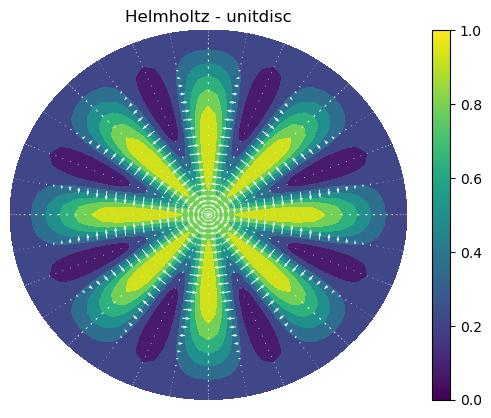

In [14]:
%matplotlib inline

u_hat2 = u_hat.refine([N*3, N*3])
u0_hat2 = u0_hat.refine([1, N*3])
sl = u_hat2.function_space().local_slice(False)
ur = u_hat2.backward() + u0_hat2.backward()[:, sl[1]]

# Wrap periodic plot around since it looks nicer
xx, yy = u_hat2.function_space().local_cartesian_mesh()
xp = np.vstack([xx, xx[0]])
yp = np.vstack([yy, yy[0]])
up = np.vstack([ur, ur[0]])
# For vector no need to wrap around and no need to refine:
xi, yi = TT.local_cartesian_mesh()

# plot
import matplotlib.pyplot as plt
plt.figure()
plt.contourf(xp, yp, up)
plt.quiver(xi, yi, gradu[0], gradu[1], scale=40, pivot='mid', color='white')
plt.colorbar()
plt.title('Helmholtz - unitdisc')
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

<!-- ======= Bibliography ======= -->

1. <a id="shen3"></a> **J. Shen**.  Efficient Spectral-Galerkin Methods III: Polar and Cylindrical Geometries, *SIAM Journal on Scientific Computing*, 18(6), pp. 1583-1604, [doi: 10.1137/S1064827595295301](https://dx.doi.org/10.1137/S1064827595295301), 1997.